Data Collection from NSDUH for 2017

In [1]:
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.stats import linregress

<h1>Data Collection and Exploration</h1>

In [2]:
datapath32 = "/Users/daphka/Google Drive/ThinkStats2/project1/NSDUH DATA/NSDUH-2017-DS0001-bndl-data-stata/NSDUH_2017.DTA"
df2017 = pd.read_stata(datapath32, convert_categoricals=False)

In [3]:
data = df2017

<h2>Analyzing Demographics</h2>

In [86]:
age = data["catage"]
print(len(age))
print(age.value_counts()/len(age))

56276
4    0.354112
2    0.245931
1    0.243834
3    0.156123
Name: catage, dtype: float64


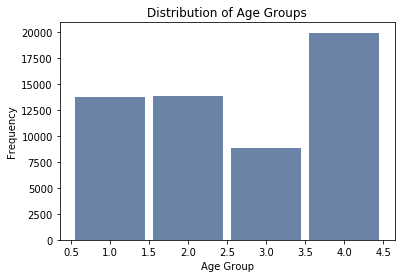

In [8]:
ageHist = thinkstats2.Hist(age)
thinkplot.Hist(ageHist)
thinkplot.Config(xlabel = "Age Group", ylabel="Frequency", title = "Distribution of Age Groups")

In [87]:
race = data["NEWRACE2"]
race.value_counts()/len(race)

1    0.588475
7    0.181534
2    0.125222
5    0.046752
6    0.038364
3    0.015033
4    0.004620
Name: NEWRACE2, dtype: float64

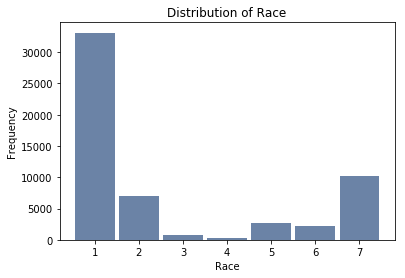

In [10]:
raceHist = thinkstats2.Hist(race)
thinkplot.Hist(raceHist)
thinkplot.Config(xlabel = "Race", ylabel = "Frequency", title = "Distribution of Race")

In [88]:
education = data["eduhighcat"]
education.value_counts()/len(education)

3    0.253892
5    0.243834
4    0.206162
2    0.200245
1    0.095867
Name: eduhighcat, dtype: float64

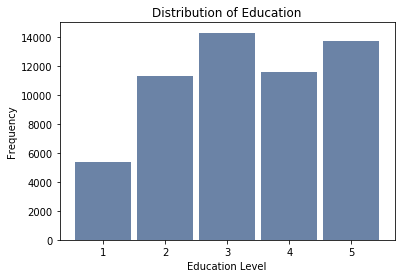

In [12]:
educationHist = thinkstats2.Hist(education)
thinkplot.Hist(educationHist)
thinkplot.Config(xlabel = "Education Level", ylabel = "Frequency", title = "Distribution of Education")

<h2> Analyzing variables: "alcyrtot" and "heryrtot"</h2>
<br>
    <li>alcyrtot: alcohol used for the past 12 months</li>
    <li> heryrtot: heroin used for the past 12 months</li>

<h3>alcyrtot: Past 12 months of alcohol use</h3>

In [52]:
data["alcyrtot"].replace([985, 991, 993, 994, 997, 998], np.nan, inplace=True)
data["heryrtot"].replace([985, 991, 993, 994, 997, 998], np.nan, inplace=True)


In [54]:
alcoholUsedPast12MO = data["alcyrtot"].dropna()
alcoholUsedPast12MO.value_counts()

104.0    2899
156.0    2460
52.0     2438
24.0     2196
12.0     1826
36.0     1805
48.0     1460
208.0    1348
60.0     1245
260.0    1203
3.0      1186
5.0      1180
2.0      1124
1.0      1054
10.0      948
4.0       900
120.0     667
6.0       641
312.0     590
72.0      572
20.0      400
15.0      363
364.0     352
96.0      350
7.0       343
8.0       313
84.0      303
180.0     290
144.0     274
240.0     269
         ... 
105.0       1
81.0        1
51.0        1
41.0        1
185.0       1
245.0       1
119.0       1
217.0       1
71.0        1
333.0       1
117.0       1
241.0       1
210.0       1
135.0       1
98.0        1
115.0       1
66.0        1
86.0        1
92.0        1
123.0       1
306.0       1
160.0       1
136.0       1
154.0       1
190.0       1
334.0       1
181.0       1
106.0       1
358.0       1
270.0       1
Name: alcyrtot, Length: 190, dtype: int64

Summary Statistics

In [55]:
alcoholUsedPast12MO.describe()

count    33532.000000
mean        82.375880
std         91.318878
min          1.000000
25%         12.000000
50%         48.000000
75%        120.000000
max        365.000000
Name: alcyrtot, dtype: float64

Histogram

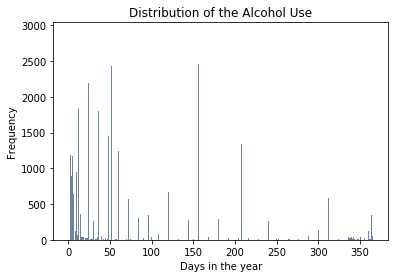

In [58]:
alcoholUsedPast12MOHist = thinkstats2.Hist(alcoholUsedPast12MO)
thinkplot.Hist(alcoholUsedPast12MOHist)
thinkplot.Config(xlabel = "Days in the year", ylabel = "Frequency", title = "Distribution of the Alcohol Use")

Shape: Multimodal - asymmetric<br>
Right skewed?? - test skewness

Probability Mass Function

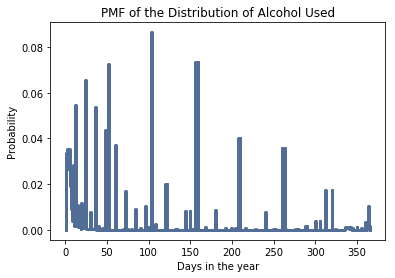

In [59]:
alcoholUsedPast12MOPmf = thinkstats2.Pmf(alcoholUsedPast12MO)
thinkplot.Pmf(alcoholUsedPast12MOPmf)
thinkplot.Config(xlabel = "Days in the year", ylabel = "Probability", title = "PMF of the Distribution of Alcohol Used")

Cumulative Distribution Functions

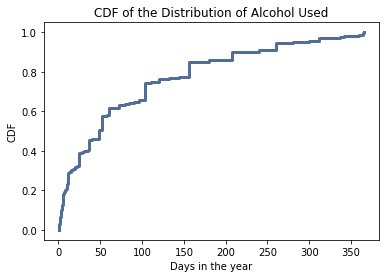

In [61]:
alcoholUsedPast12MOCdf = thinkstats2.Cdf(alcoholUsedPast12MO)
thinkplot.Cdf(alcoholUsedPast12MOCdf)
thinkplot.Config(xlabel = "Days in the year", ylabel = "CDF", title = "CDF of the Distribution of Alcohol Used")

Is the distribution of alcohol use Normal?

In [62]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label) #plots percentile of values

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

function to determine

In [63]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, '+', alpha=0.3, label=label)

n, mean, std 33532 80.33293773963848 87.3373488181064


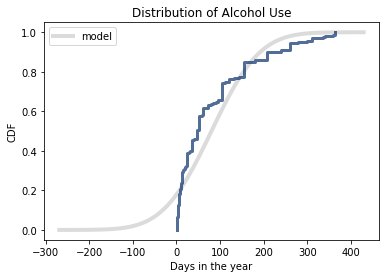

In [64]:
MakeNormalModel(alcoholUsedPast12MO, label='')

thinkplot.Config(title='Distribution of Alcohol Use', 
         xlabel='Days in the year', 
         ylabel='CDF')

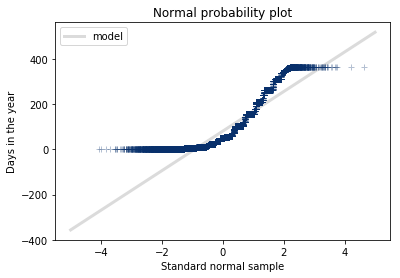

In [65]:
MakeNormalPlot(alcoholUsedPast12MO, label='')

thinkplot.Config(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Days in the year')

Is it exponential?

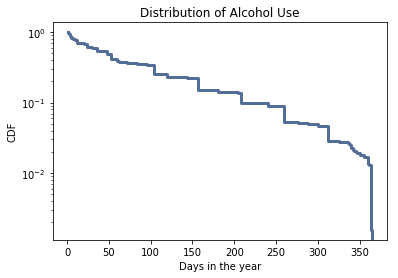

In [66]:
thinkplot.Cdf(alcoholUsedPast12MOCdf, complement=True)
thinkplot.Config(title='Distribution of Alcohol Use', 
         xlabel='Days in the year', 
         ylabel='CDF',
         yscale = "log")

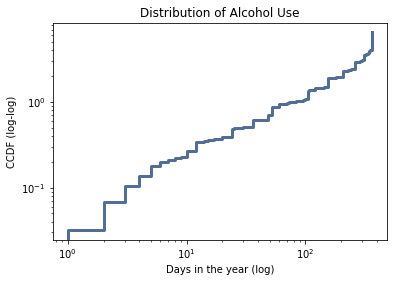

In [90]:
thinkplot.Cdf(alcoholUsedPast12MOCdf, transform = "weibull")
thinkplot.Config(title = "Distribution of Alcohol Use",
                 xlabel = "Days in the year (log)",
                 ylabel = "CCDF (log-log)",
                 yscale = "log", xscale = "log")

<h3>heryrtot: Heroin Used For the Past 12 Months</h3>

In [26]:
heroinUsedPast12MO = data["heryrtot"].dropna()
heroinUsedPast12MO.value_counts()

1.0      18
364.0    15
260.0    10
180.0    10
2.0      10
120.0    10
10.0      9
104.0     9
156.0     8
312.0     8
3.0       7
60.0      7
52.0      5
5.0       5
20.0      4
48.0      4
12.0      4
6.0       3
36.0      3
208.0     3
8.0       3
144.0     3
360.0     3
72.0      3
4.0       3
24.0      3
7.0       2
240.0     2
30.0      2
96.0      2
100.0     2
300.0     2
363.0     2
351.0     2
365.0     2
288.0     1
200.0     1
276.0     1
38.0      1
95.0      1
14.0      1
130.0     1
25.0      1
22.0      1
280.0     1
9.0       1
80.0      1
107.0     1
353.0     1
355.0     1
23.0      1
15.0      1
11.0      1
325.0     1
168.0     1
117.0     1
33.0      1
330.0     1
16.0      1
Name: heryrtot, dtype: int64

In [27]:
heroinUsedPast12MO.describe()

count    212.000000
mean     125.066038
std      128.519331
min        1.000000
25%       10.000000
50%       87.500000
75%      216.000000
max      365.000000
Name: heryrtot, dtype: float64

Histogram

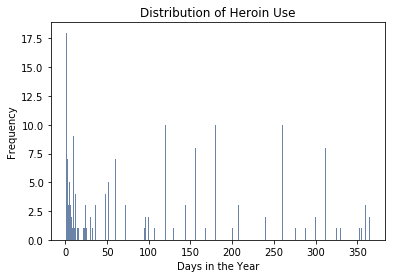

In [28]:
heroinUsedPast12MOHist = thinkstats2.Hist(heroinUsedPast12MO)
thinkplot.Hist(heroinUsedPast12MOHist)
thinkplot.Config(xlabel = "Days in the Year", ylabel = "Frequency", title = "Distribution of Heroin Use")

Probability Mass Function

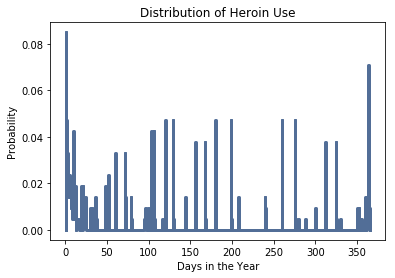

In [29]:
heroinUsedPast12MOPmf = thinkstats2.Pmf(heroinUsedPast12MO)
thinkplot.Pmf(heroinUsedPast12MOPmf)
thinkplot.Config(xlabel = "Days in the Year", ylabel = "Probability", title = "Distribution of Heroin Use")

Cumulative Distribution Function

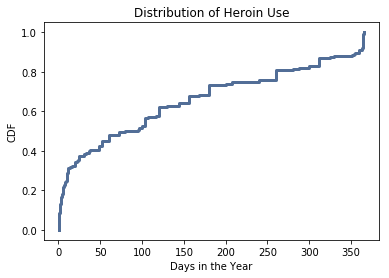

In [30]:
heroinUsedPast12MOCdf = thinkstats2.Cdf(heroinUsedPast12MO)
thinkplot.Cdf(heroinUsedPast12MOCdf)
thinkplot.Config(xlabel = "Days in the Year", ylabel="CDF", title = "Distribution of Heroin Use")

Can heroin used be model using a normal analytic distribution?

n, mean, std 212 123.95192307692308 126.69909687976441


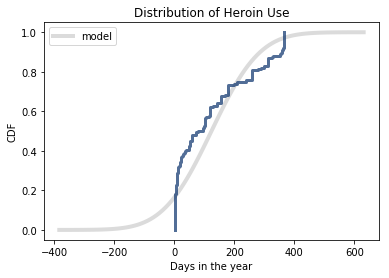

In [31]:
MakeNormalModel(heroinUsedPast12MO, label="")
thinkplot.Config(xlabel = "Days in the year", ylabel = "CDF", title="Distribution of Heroin Use")

Is it lognormal?

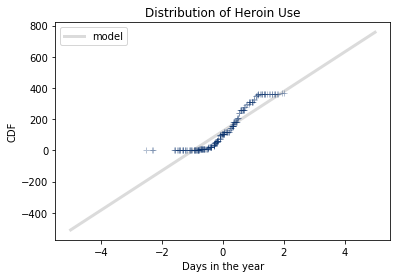

In [32]:
MakeNormalPlot(heroinUsedPast12MO, label="")
thinkplot.Config(xlabel = "Days in the year", ylabel = "CDF", title="Distribution of Heroin Use")

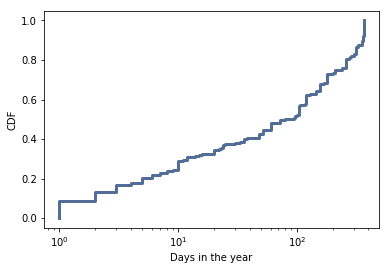

In [33]:
thinkplot.Cdf(heroinUsedPast12MOCdf, label="")
thinkplot.Config(xlabel = "Days in the year", ylabel = "CDF", xscale = "log")

can it be modeled with an exponential distribution?

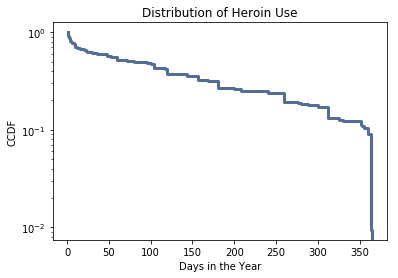

In [34]:
thinkplot.Cdf(heroinUsedPast12MOCdf, complement=True, label='')
thinkplot.Config(xlabel="Days in the Year", ylabel = "CCDF", title = "Distribution of Heroin Use", yscale='log')

Is it pareto?

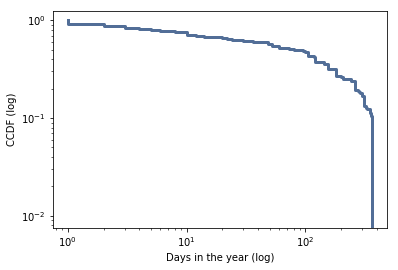

In [35]:
thinkplot.Cdf(heroinUsedPast12MOCdf, complement=True, label = "")
thinkplot.Config(xlabel = "Days in the year (log)", ylabel = "CCDF (log)", yscale = "log", xscale ="log")

is it weibull?

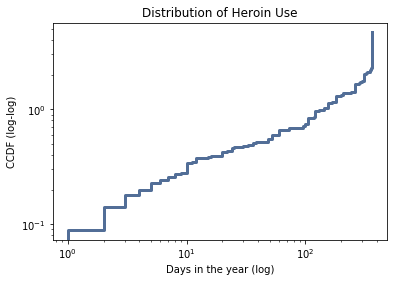

In [94]:
thinkplot.Cdf(heroinUsedPast12MOCdf, transform = "weibull")
thinkplot.Config(title = "Distribution of Heroin Use",
                 xlabel = "Days in the year (log)", 
                 ylabel = "CCDF (log-log)",
                 yscale = "log", xscale = "log")

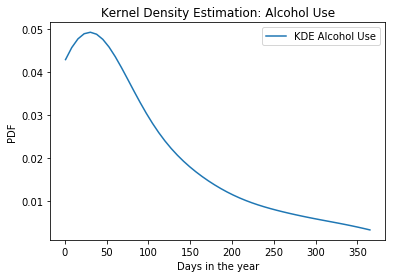

In [92]:
kde = gaussian_kde(alcoholUsedPast12MO, bw_method=0.5)

xs = np.linspace(alcoholUsedPast12MO.min(), alcoholUsedPast12MO.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE Alcohol Use')

thinkplot.Config(title = "Kernel Density Estimation: Alcohol Use",
                 xlabel='Days in the year', ylabel='PDF')

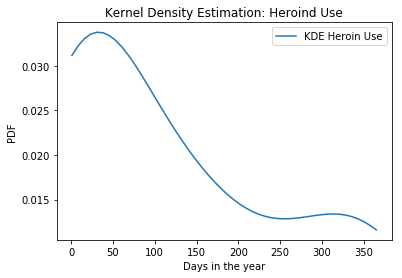

In [95]:
kde = gaussian_kde(heroinUsedPast12MO, bw_method=0.5)

xs = np.linspace(heroinUsedPast12MO.min(), heroinUsedPast12MO.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE Heroin Use')

thinkplot.Config(title = "Kernel Density Estimation: Heroind Use",
                 xlabel='Days in the year', ylabel='PDF')

<h1>Correlation Analysis<h1>

<h2>Scatterplot and Linear Regression</h2>

In [79]:
alcoholUsedPast12MONAN = data["alcyrtot"]
heroinUsedPast12MONAN = data["heryrtot"]
len(alcoholUsedPast12MONAN), len(heroinUsedPast12MONAN)

(56276, 56276)

LinregressResult(slope=-0.27983148967809446, intercept=140.3996268371461, rvalue=-0.22416009409678647, pvalue=0.003907859976324315, stderr=0.09558416331698188)

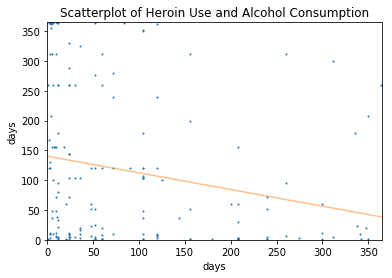

In [96]:
plt.plot(alcoholUsedPast12MONAN, heroinUsedPast12MONAN, 'o', markersize =1)

plt.title("Scatterplot of Heroin Use and Alcohol Consumption")
plt.xlabel('days')
plt.ylabel('days')
plt.axis([0, 365, 0, 365]);



subset = data.dropna(subset=['alcyrtot', 'heryrtot']) #drops nan from multiple columns using subset as a parameter of dropna()

xs = subset["alcyrtot"] #x-values
ys = subset["heryrtot"]#y-values

res = linregress(xs, ys) #LSE - minimizes the error

# plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.5)
res